In [1]:
import pandas as pd
import numpy as np

In [2]:
population_dict = {
    'California': 38332521,
    'Texas': 26448193,
    'New York': 19651127,
    'Florida': 19552860,
    'Illinois': 12882135
}
population = pd.Series(population_dict)

In [3]:
area_dict = {
    'California': 423967,
    'Texas': 695662,
    'New York': 141297,
    'Florida': 170312,
    'Illinois': 149995
}
area = pd.Series(area_dict)

In [4]:
states = pd.DataFrame({'population':population, 'area':area})

In [5]:
states['density'] = states['population'] / states['area']

In [6]:
states

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


In [7]:
index = [('California', 2000), ('California', 2010),
                ('New York', 2000), ('New York', 2010),
                ('Texas', 2000), ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)

populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]

pop = pd.Series(populations, index=index)

In [8]:
pop.index.names = ['States', 'Year']

In [9]:
pop[:, 2000]

States
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [10]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [11]:
df2 = df.set_index('key')
mapping = {'A':'Apricot', 'B':'Bugga', 'C':'Cattoho'}

df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,Apricot,1.5,4.0
b,Bugga,2.5,3.5
c,Cattoho,3.5,6.0


In [12]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [13]:
planets['decade'] = 10 * (planets['year'] // 10)
planets['decade'] = planets['decade'].astype(str) + 's'

In [14]:
planets.groupby(['method', 'decade'])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [15]:
titanic = sns.load_dataset('titanic')
titanic.shape

(891, 15)

In [16]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc={'survived':'mean'}, margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [21]:
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                               '2015-Jul-6', '07-07-2015', '20150708'])
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [22]:

start_month = "2021-01"
periods = 12
statement_date = 17
due_day_after_statement = 15

pd.date_range(start_month, periods=periods, freq='MS') + pd.to_timedelta(statement_date - 1, 'D') + pd.to_timedelta(due_day_after_statement, 'D')

DatetimeIndex(['2021-02-01', '2021-03-04', '2021-04-01', '2021-05-02',
               '2021-06-01', '2021-07-02', '2021-08-01', '2021-09-01',
               '2021-10-02', '2021-11-01', '2021-12-02', '2022-01-01'],
              dtype='datetime64[ns]', freq=None)

In [28]:
from pandas_datareader import data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [47]:
goog = data.DataReader('GOOG', start='2004', end='2020',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [48]:
goog = goog['Close']

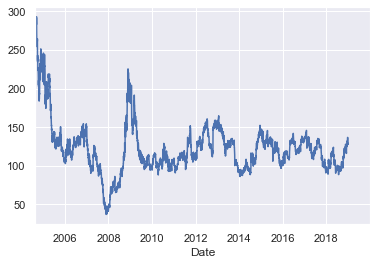

In [61]:
roi = 100 * (goog.shift(-365)/ goog) - 1
roi.plot()